In [ ]:
from simulation_base.env import resume_env
import numpy as np

print("Setting Up Environment", flush =True)
env  = resume_env(plot=False, dump_CL=False, dump_vtu=False, dump_debug=False)

/rds/general/user/pg221/home/PhD_projects2/dreamer_flows/cyl


--------------------------------------------------------------------------
No OpenFabrics connection schemes reported that they were able to be
used on a specific port.  As such, the openib BTL (OpenFabrics
support) will be disabled for this port.

  Local host:           cx3-1-29
  Local device:         mlx5_0
  Local port:           1
  CPCs attempted:       rdmacm, udcm
--------------------------------------------------------------------------
bash: which: line 1: syntax error: unexpected end of file
bash: error importing function definition for `which'
bash: module: line 1: syntax error: unexpected end of file
bash: error importing function definition for `module'
bash: scl: line 1: syntax error: unexpected end of file
bash: error importing function definition for `scl'
bash: ml: line 1: syntax error: unexpected end of file
bash: error importing function definition for `ml'
bash: which: line 1: syntax error: unexpected end of file
bash: error importing function definition for `whic

iUFL can be obtained from https://github.com/MiroK/ufl-interpreter


2024-06-04 14:52:21.907626: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-04 14:52:22.761220: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/rds/general/user/pg221/home/anaconda3/envs/dreamer_cyl2/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


Setting Up Environment
Number of probes: 64
test cwd env:  /rds/general/user/pg221/home/PhD_projects2/dreamer_flows/cyl
len(self.output_params[locations]):  64
self.history_parameters[number_of_probe]:  64


In [ ]:
print(env.number_steps_execution)

In [ ]:
import vtk

# Create a reader
reader = vtk.vtkXMLUnstructuredGridReader()

# Set the file name
reader.SetFileName("../dreamer/results/area_out000000.vtu")

# Update the reader to read the file
reader.Update()

# Get the output
output = reader.GetOutput()

# Print some information
print(f"Number of points: {output.GetNumberOfPoints()}")
print(f"Number of cells: {output.GetNumberOfCells()}")

In [4]:
points = output.GetPoints()

# Extract the coordinates of each point
num_points = points.GetNumberOfPoints()
coordinates = []
for i in range(num_points):
    coord = points.GetPoint(i)
    coordinates.append(coord)
#     print(f"Point {i}: {coord}")

AttributeError: 'NoneType' object has no attribute 'GetNumberOfPoints'

In [ ]:
coordinates = np.array(coordinates)
print(coordinates[:,:2].shape)

In [35]:
# np.save("mesh_points/points.npy",coordinates)

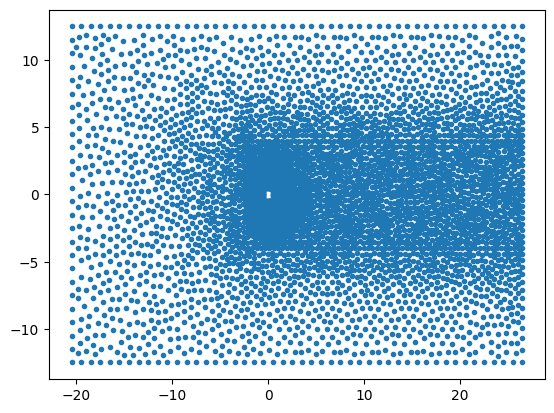

In [36]:
import matplotlib.pyplot as plt

plt.plot(coordinates[:,0],coordinates[:,1],'.')

In [28]:
#masks

def masks(coordinates, xmin = -2.5, xmax = 10, ymin = -2.5, ymax = 2.5, sample_rate=10):
    
    nodes_X = coordinates[::sample_rate,0]
    nodes_Y = coordinates[::sample_rate,1]

    node_X = nodes_X[np.newaxis,:]
    node_Y = nodes_Y[np.newaxis,:]

    X_min, X_max = xmin, xmax
    Y_min, Y_max = ymin, ymax

    X_mask = (node_X[0] >= X_min) & (node_X[0] <= X_max) 
    Y_mask = (node_Y[0] >= Y_min) & (node_Y[0] <= Y_max)

    sub_X = node_X[0][np.logical_and(X_mask, Y_mask)]
    sub_Y = node_Y[0][np.logical_and(X_mask, Y_mask)]
    
    return sub_X, sub_Y
    
sub_X, sub_Y = masks(coordinates, sample_rate = 1)


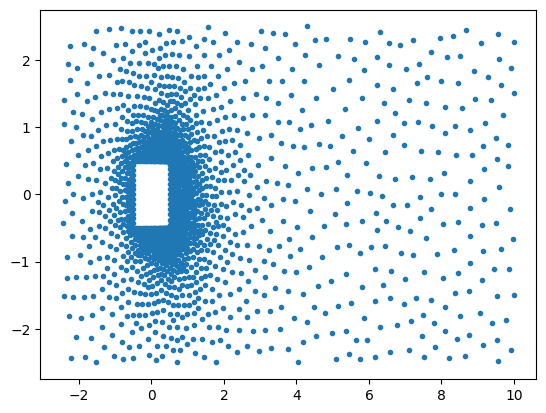

In [29]:
plt.plot(sub_X, sub_Y,'.')

In [32]:
coordinates[:,:,0].shape

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [31]:
import numpy as np

# Example array
array = np.array([[[1, 2, 3], [4, 5, 6]]])
print("Original array shape:", array.shape)

# Remove the first axis by indexing
indexed_array = array[0]
print("Array shape after indexing:", indexed_array.shape)


Original array shape: (1, 2, 3)
Array shape after indexing: (2, 3)


In [2]:
len(coordinates)

NameError: name 'coordinates' is not defined